Importing Libraries and Loading dataset:
----

In [1]:
import numpy as np #NumPy is a library for dealing with linear algebra and adding support for large, multi-dimensional arrays and matrices.
import pandas as pd #Pandas is a library for data manipulation and analysis # data processing, CSV file I/O (e.g. pd.read_csv)
import sklearn #Sklearn is a library that provides many unsupervised and supervised learning algorithms.
import scipy.stats as stats #Scipy is a library for scientific computing and technical computing
import math #Scipy is a library for scientific computing and technical computing


import seaborn as sns #Seaborn is a library forstatistical data visualization
import matplotlib.pyplot as plt#Matplotlib is a plotting library 

In [69]:
df=pd.read_csv('train.csv') # Read the 'raw' train data
df.shape

(1460, 81)

In [70]:
# Keeping a reference to variable descriptions
data_description = open("data_description.txt", "r")
print(data_description.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

'MSZoning' Nominal variable
'Street', Nominal variable
'LotShape'Nominal variable
'LandContour' Nominal variable
'Utilities' Nominal variable
'LotConfig' Nominal variable
'LandSlope' Ordinal variables
'Neighborhood' Nominal variable
'Condition1' Nominal variable
'Condition2' Nominal variable
'BldgType' Nominal variable
'HouseStyle' Nominal variable
'RoofStyle' Nominal variable
'RoofMatl' Nominal variable
'Exterior1st' Nominal variable
'Exterior2nd' Nominal variable
'MasVnrType' Nominal variable
'ExterQual' Ordinal variables
'ExterCond' Ordinal variables
'Foundation' Nominal variable
'BsmtQual' Ordinal variables
'BsmtCond' Ordinal variables
'BsmtExposure' Ordinal variables
'BsmtFinType1' Ordinal variables
'BsmtFinType2', Ordinal variables
'Heating' Nominal variable
'HeatingQC'Ordinal variables
'CentralAir' Nominal variable
'Electrical' Nominal variable
'KitchenQual'Ordinal variables
'Functional' Nominal variable
'FireplaceQu'Ordinal variables
'GarageType' Nominal variable
'GarageFinish' Nominal variable
'GarageQual'Ordinal variables
'GarageCond'Ordinal variables
'PavedDrive' Nominal variable
'SaleType' Nominal variable
'SaleCondition' Nominal variable

---
Explantory Data Analysis
---

---

#### Understanding Data Types and checking for missing data

In [71]:
df.head() # show the train data structure

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [72]:
df.shape #Shows how many rows and columns the raw train data has

(1460, 81)

In [73]:
df.info() # Lists for each parameter its type and how many null values it has.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [74]:
# Listing all the columns that are of 'object' type
columns=df.select_dtypes(include=['object']).columns
print(columns, len(columns))

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object') 43


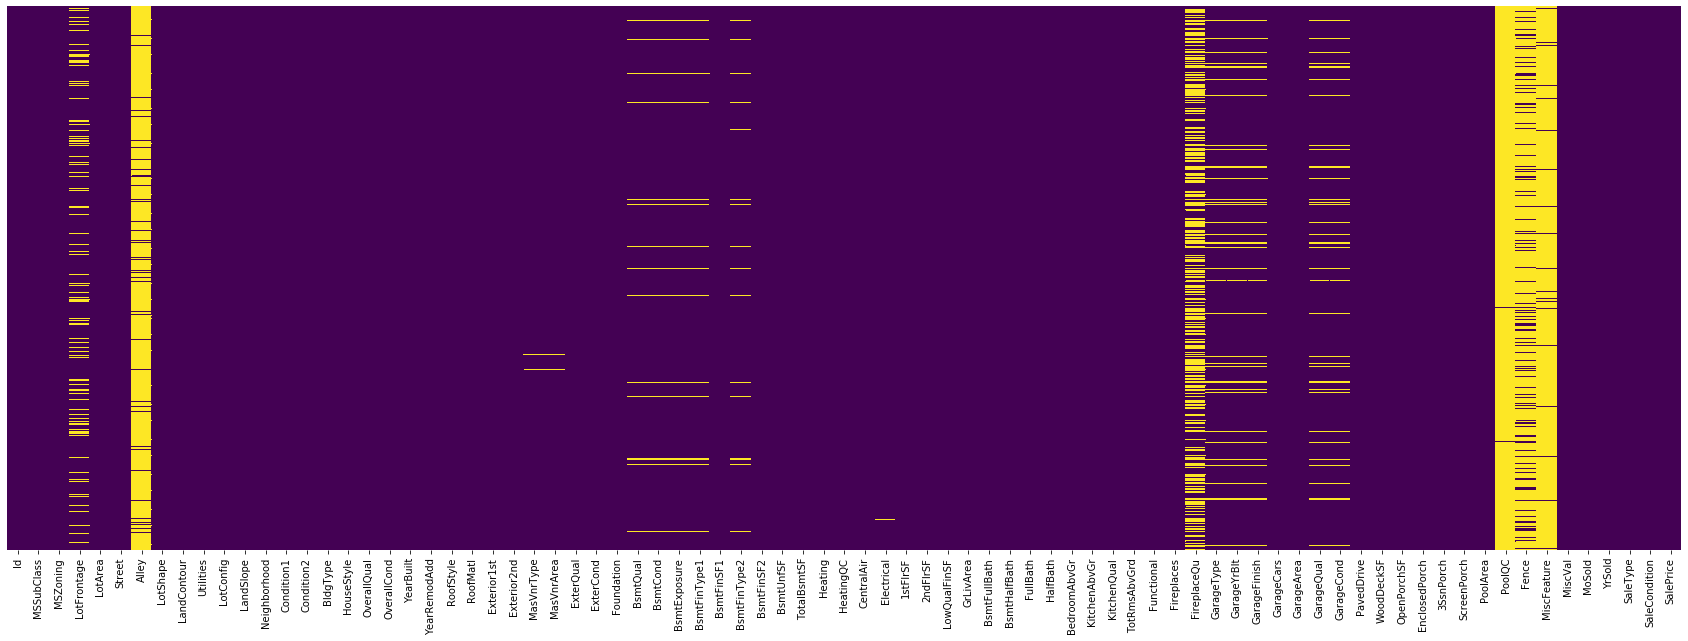

In [75]:
# Plots a heat map to show where there are null values in each of the parameters. 
plt.figure(figsize=(30,10))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [76]:
# shows a list of all null where there are null values in each of the parameters
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

#### Observations:

The above data info shows us the followings that:
1. There are differnt types (i.e. numerical and categorical) dtypes: float64(3), int64(35), object(43);
2. The object datatype (43) needs be to be encoded and converted to numbers to be able;
3. The data set is inbalanced and require to further preprocessed;
4. In addition, some of the features need to be scaled;
5. The Id column will be removed as it does not have any realtion with the price;
6. A few columns contains null value and therefore, we will drop any column that contains null value over 50% of its values (i.e Alley, PoolQC, Fence, MiscFeature);
7. For the other columns, we will need to assess further to check if we can replace null values with (0, average or other values, or drop the rows entirely;

---
Data Preprocessimng
---

In [77]:
df.drop(['Id'],axis=1, inplace=True)

#### Remove columns with null >50%

In [78]:
df.drop(['Alley'],axis=1, inplace=True)
df.drop(['PoolQC'],axis=1, inplace=True)
df.drop(['Fence'],axis=1, inplace=True)
df.drop(['MiscFeature'],axis=1, inplace=True)

#### Categorical Encoding - Ordinal Variable

In [79]:
df["BsmtQual"].fillna("No Bsmt", inplace = True)
df["BsmtCond"].fillna("No Bsmt", inplace = True)
df["BsmtExposure"].fillna("No Bsmt", inplace = True)
df["BsmtFinType1"].fillna("No Bsmt", inplace = True)
df["BsmtFinType2"].fillna("No Bsmt", inplace = True)
df["FireplaceQu"].fillna("No Fireplace", inplace = True)
df["GarageQual"].fillna("No Garage", inplace = True)
df["GarageCond"].fillna("No Garage", inplace = True)

In [80]:
from sklearn.preprocessing import LabelEncoder
df['LandSlope_LE'] = LabelEncoder().fit_transform(df.LandSlope)
df['ExterQual_LE'] = LabelEncoder().fit_transform(df.ExterQual)
df['ExterCond_LE'] = LabelEncoder().fit_transform(df.ExterCond)
df['BsmtQual_LE'] = LabelEncoder().fit_transform(df.BsmtQual)
df['BsmtCond_LE'] = LabelEncoder().fit_transform(df.BsmtCond)
df['BsmtExposure_LE'] = LabelEncoder().fit_transform(df.BsmtExposure)
df['BsmtFinType1_LE'] = LabelEncoder().fit_transform(df.BsmtFinType1)
df['BsmtFinType2_LE'] = LabelEncoder().fit_transform(df.BsmtFinType2)
df['HeatingQC_LE'] = LabelEncoder().fit_transform(df.HeatingQC)
df['KitchenQual_LE'] = LabelEncoder().fit_transform(df.KitchenQual)
df['FireplaceQu_LE'] = LabelEncoder().fit_transform(df.FireplaceQu)
df['GarageQual_LE'] = LabelEncoder().fit_transform(df.GarageQual)
df['GarageCond_LE'] = LabelEncoder().fit_transform(df.GarageCond)

#### Categorical Encoding - Nominal Variable

In [81]:
pd.get_dummies( df, prefix =['Zone'], columns = ['MSZoning'])
pd.get_dummies( df, prefix =['Str'], columns = ['Street'])
pd.get_dummies( df, prefix =['Lot'], columns = ['LotShape'])
pd.get_dummies( df, prefix =['Land'], columns = ['LandContour'])
pd.get_dummies( df, prefix =['Util'], columns = ['Utilities'])
pd.get_dummies( df, prefix =['LotC'], columns = ['LotConfig'])

pd.get_dummies( df, prefix =['NH'], columns = ['Neighborhood'])
pd.get_dummies( df, prefix =['Cond1'], columns = ['Condition1'])
pd.get_dummies( df, prefix =['Cond2'], columns = ['Condition2'])
pd.get_dummies( df, prefix =['Bldg'], columns = ['BldgType'])
pd.get_dummies( df, prefix =['HS'], columns = ['HouseStyle'])
pd.get_dummies( df, prefix =['RS'], columns = ['RoofStyle'])
pd.get_dummies( df, prefix =['RM'], columns = ['RoofMatl'])
pd.get_dummies( df, prefix =['Ex1'], columns = ['Exterior1st'])
pd.get_dummies( df, prefix =['Ex2'], columns = ['Exterior2nd'])
pd.get_dummies( df, prefix =['MVT'], columns = ['MasVnrType'])

pd.get_dummies( df, prefix =['Fndtn'], columns = ['Foundation'])

pd.get_dummies( df, prefix =['Heat'], columns = ['Heating'])
pd.get_dummies( df, prefix =['HeatQC'], columns = ['HeatingQC'])
pd.get_dummies( df, prefix =['CA'], columns = ['CentralAir'])
pd.get_dummies( df, prefix =['Elec'], columns = ['Electrical'])
pd.get_dummies( df, prefix =['KQ'], columns = ['KitchenQual'])
pd.get_dummies( df, prefix =['Func'], columns = ['Functional'])

pd.get_dummies( df, prefix =['GT'], columns = ['GarageType'])
pd.get_dummies( df, prefix =['GF'], columns = ['GarageFinish'])

pd.get_dummies( df, prefix =['PD'], columns = ['PavedDrive'])
pd.get_dummies( df, prefix =['ST'], columns = ['SaleType'])
pd.get_dummies( df, prefix =['SC'], columns = ['SaleCondition'])

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,KitchenQual_LE,FireplaceQu_LE,GarageQual_LE,GarageCond_LE,SC_Abnorml,SC_AdjLand,SC_Alloca,SC_Family,SC_Normal,SC_Partial
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,2,3,5,5,0,0,0,0,1,0
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,3,5,5,5,0,0,0,0,1,0
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,2,5,5,5,0,0,0,0,1,0
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,2,2,5,5,1,0,0,0,0,0
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,2,5,5,5,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,3,5,5,5,0,0,0,0,1,0
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,3,5,5,5,0,0,0,0,1,0
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,2,2,5,5,0,0,0,0,1,0
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,2,3,5,5,0,0,0,0,1,0


In [82]:
# shows a list of all null where there are null values in each of the parameters
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

LotFrontage     259
MasVnrType        8
MasVnrArea        8
Electrical        1
GarageType       81
GarageYrBlt      81
GarageFinish     81
dtype: int64

In [175]:
g = df.columns.to_series().groupby(df.dtypes).groups
g

{dtype('int32'): Index(['LandSlope_LE', 'ExterQual_LE', 'ExterCond_LE', 'BsmtQual_LE',
        'BsmtCond_LE', 'BsmtExposure_LE', 'BsmtFinType1_LE', 'BsmtFinType2_LE',
        'HeatingQC_LE', 'KitchenQual_LE', 'FireplaceQu_LE', 'GarageQual_LE',
        'GarageCond_LE'],
       dtype='object'),
 dtype('int64'): Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
        'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
        '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
        'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
        'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
        'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
        'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
       dtype='object'),
 dtype('float64'): Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object'),
 dtype('O'): Index(['MSZoning', 'Street', 'LotShape'

#### Convert int32 to int64 

In [ ]:
['LandSlope_LE', 'ExterQual_LE', 'ExterCond_LE', 'BsmtQual_LE',
        'BsmtCond_LE', 'BsmtExposure_LE', 'BsmtFinType1_LE', 'BsmtFinType2_LE',
        'HeatingQC_LE', 'KitchenQual_LE', 'FireplaceQu_LE', 'GarageQual_LE',
        'GarageCond_LE']

#### Fillin null values with mode and mean

In [83]:
df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].mean()) 
# Fill the null values in numerical (continuous) parameter with the MEAN of the non-null. 

df['MasVnrType']=df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['MasVnrArea']=df['MasVnrArea'].fillna(df['MasVnrArea'].mean())

df['Electrical']=df['Electrical'].fillna(df['Electrical'].mode()[0])

df['FireplaceQu']=df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0]) 
# Fill the null values of an object parameter with the top mode of the non-null, i.e., with mode()[0]

df['GarageType']=df['GarageType'].fillna(df['GarageType'].mode()[0])
df['GarageYrBlt']=df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean())
df['GarageFinish']=df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])

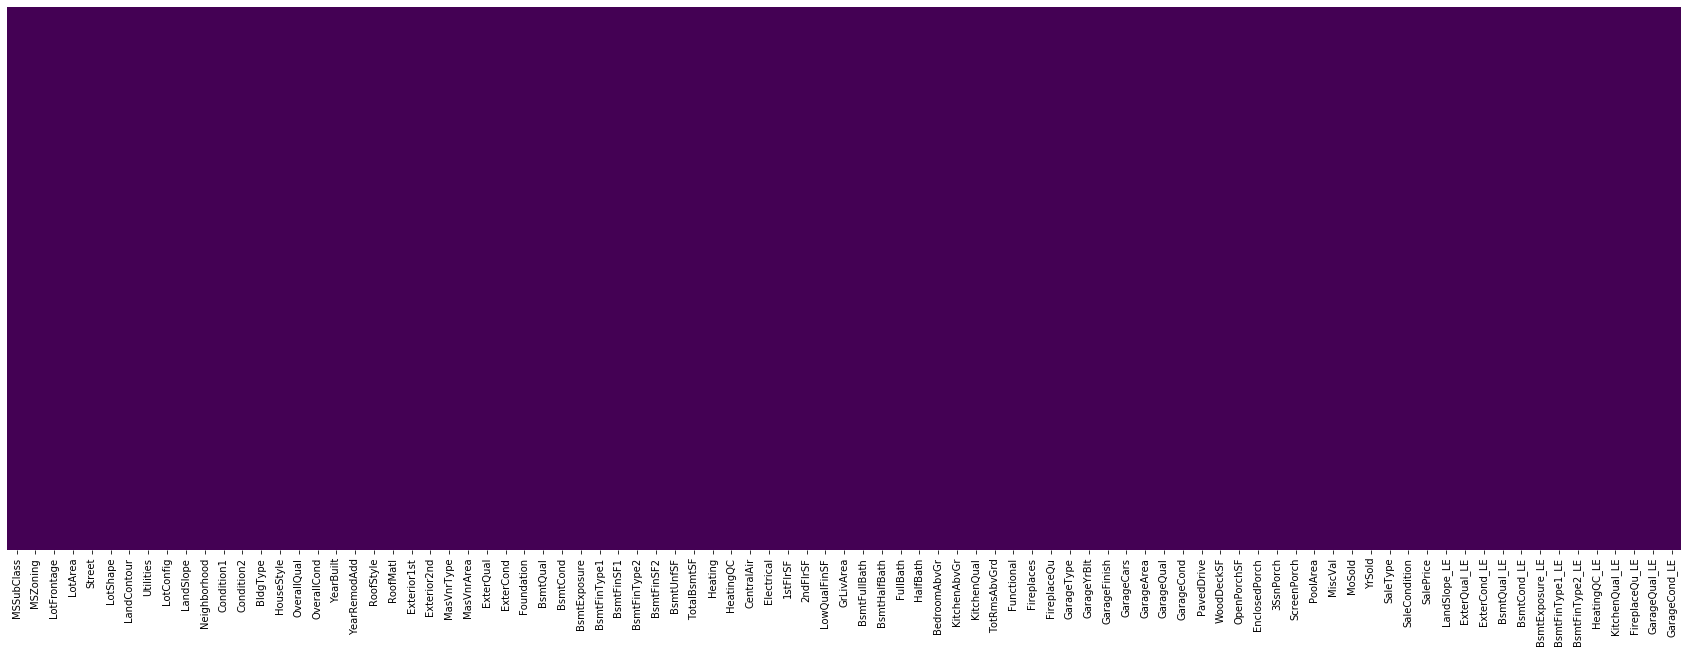

In [84]:
# Plots a heat map to check if any missing data is still left in each of the parameters. 
plt.figure(figsize=(30,10))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

---

### Check if numerical data has any outliers

In [85]:
df_num=df.select_dtypes(include=['float','int32','int64']) #select datatypes 'float'
df_float=df.select_dtypes(include=['float']) #select datatypes 'float'
df_int32=df.select_dtypes(include=['int32']) #select datatypes 'int32'
df_int64=df.select_dtypes(include=['int64']) #select datatypes 'int64'

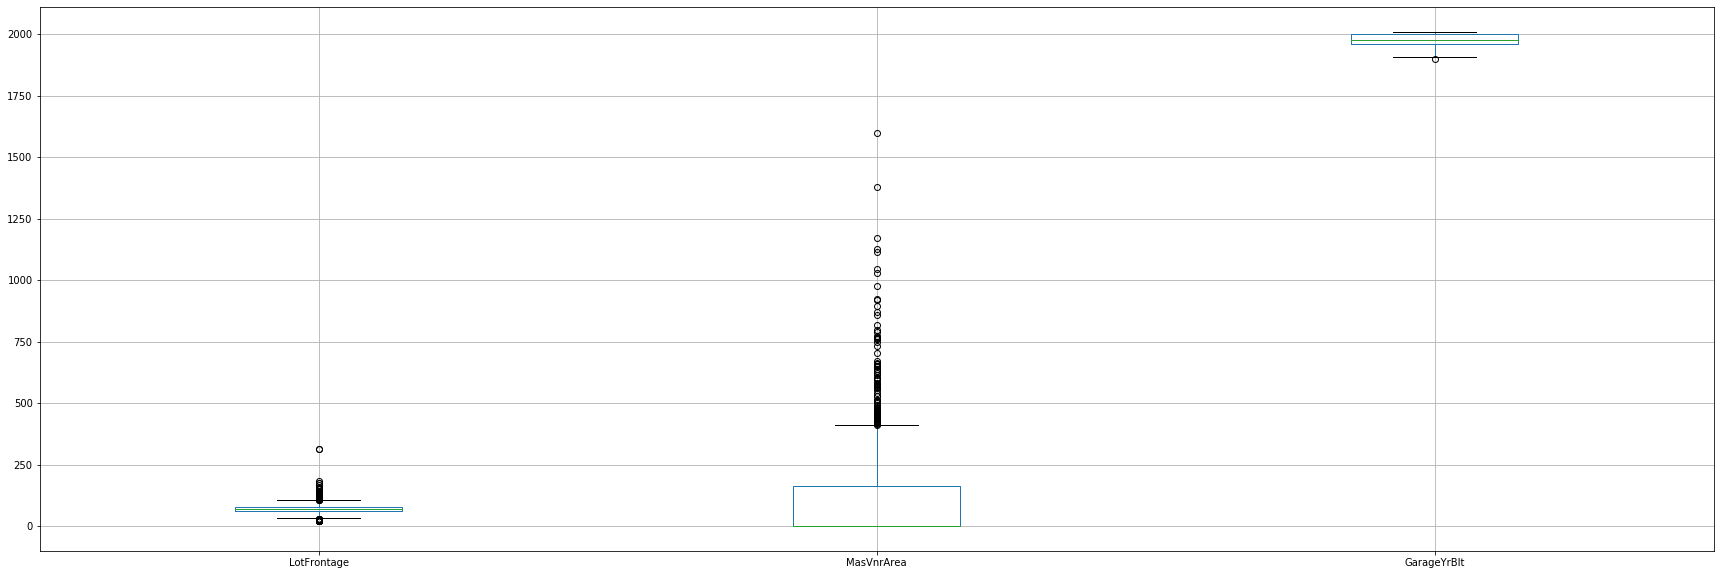

In [86]:
#Plots a box plot to show where there are outliers in each of the parameters.
plt.figure(figsize=(30,10))
boxplot = df_float.boxplot()

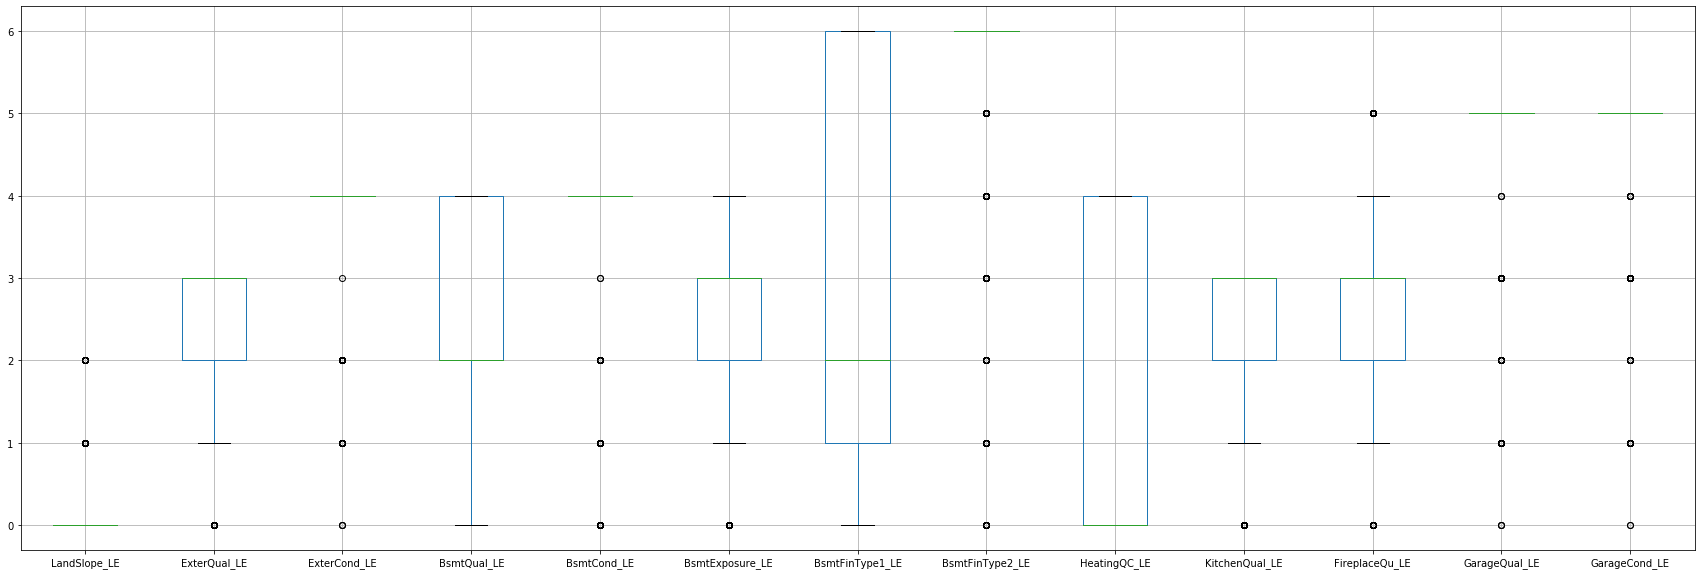

In [87]:
#Plots a box plot to show where there are outliers in each of the parameters.
plt.figure(figsize=(30,10))
boxplot = df_int32.boxplot()

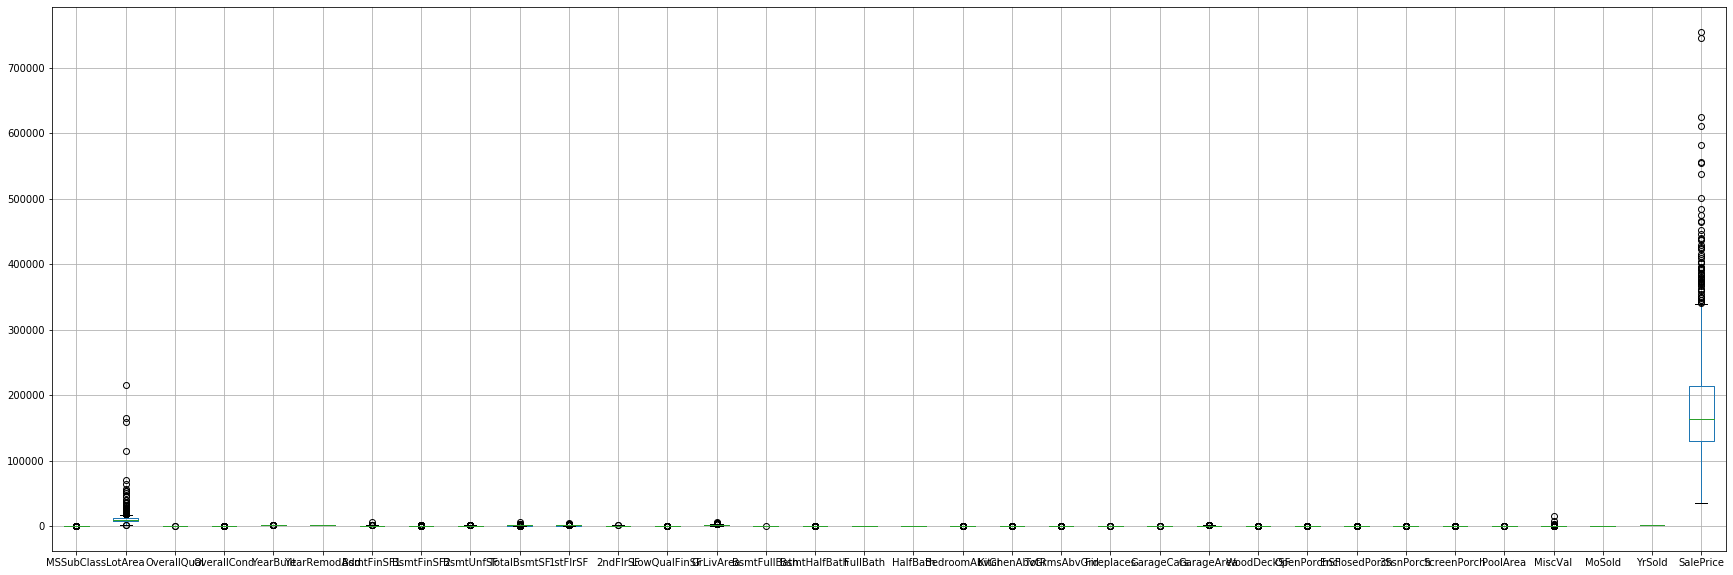

In [88]:
#Plots a box plot to show where there are outliers in each of the parameters.
plt.figure(figsize=(30,10))
boxplot = df_int64.boxplot()

---

#### Statisitcal Analysis and Data Visulization

In [89]:
df.describe().T # provide statistical data about the numerical parameters of the raw train data

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.000000,70.00,190.0
LotFrontage,1460.0,70.049958,22.024023,21.0,60.00,70.049958,79.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.500000,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.000000,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.000000,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.000000,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.000000,2004.00,2010.0
MasVnrArea,1460.0,103.685262,180.569112,0.0,0.00,0.000000,164.25,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.500000,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.000000,0.00,1474.0


#### Observations:
The above boxplot shows that:
1. The majority of the data parameters contain outlier;  
2. The data parameter that concerns the most is <Lot Area> as it has alot of outliers.Thus, we need to further assess if we need to keep this parameter or drop to imporve model accurecy;
2. The target variable "Sale Price" has outliers when the price is over ~350K.   

#### Remove Outliers 

In [115]:
df2 = df

In [116]:
Q1 = df2.quantile(0.05)
Q3 = df2.quantile(0.95)
IQR = Q3 - Q1
print(IQR)

MSSubClass            140.00
LotFrontage            68.05
LotArea             14089.45
OverallQual             4.00
OverallCond             4.00
YearBuilt              91.00
YearRemodAdd           57.00
MasVnrArea            456.00
BsmtFinSF1           1274.00
BsmtFinSF2            396.20
BsmtUnfSF            1468.00
TotalBsmtSF          1233.70
1stFlrSF             1158.30
2ndFlrSF             1141.05
LowQualFinSF            0.00
GrLivArea            1618.10
BsmtFullBath            1.00
BsmtHalfBath            1.00
FullBath                1.00
HalfBath                1.00
BedroomAbvGr            2.00
KitchenAbvGr            0.00
TotRmsAbvGrd            6.00
Fireplaces              2.00
GarageYrBlt            77.00
GarageCars              3.00
GarageArea            850.10
WoodDeckSF            335.00
OpenPorchSF           175.05
EnclosedPorch         180.15
3SsnPorch               0.00
ScreenPorch           160.00
PoolArea                0.00
MiscVal                 0.00
MoSold        

In [117]:
df2 = df2[~((df2 < (Q1 - 1.5 * IQR)) |(df2 > (Q3 + 1.5 * IQR))).any(axis=1)]
print (df.shape)
print('-------------')
print(df2.shape)


(1460, 89)
-------------
(1223, 89)


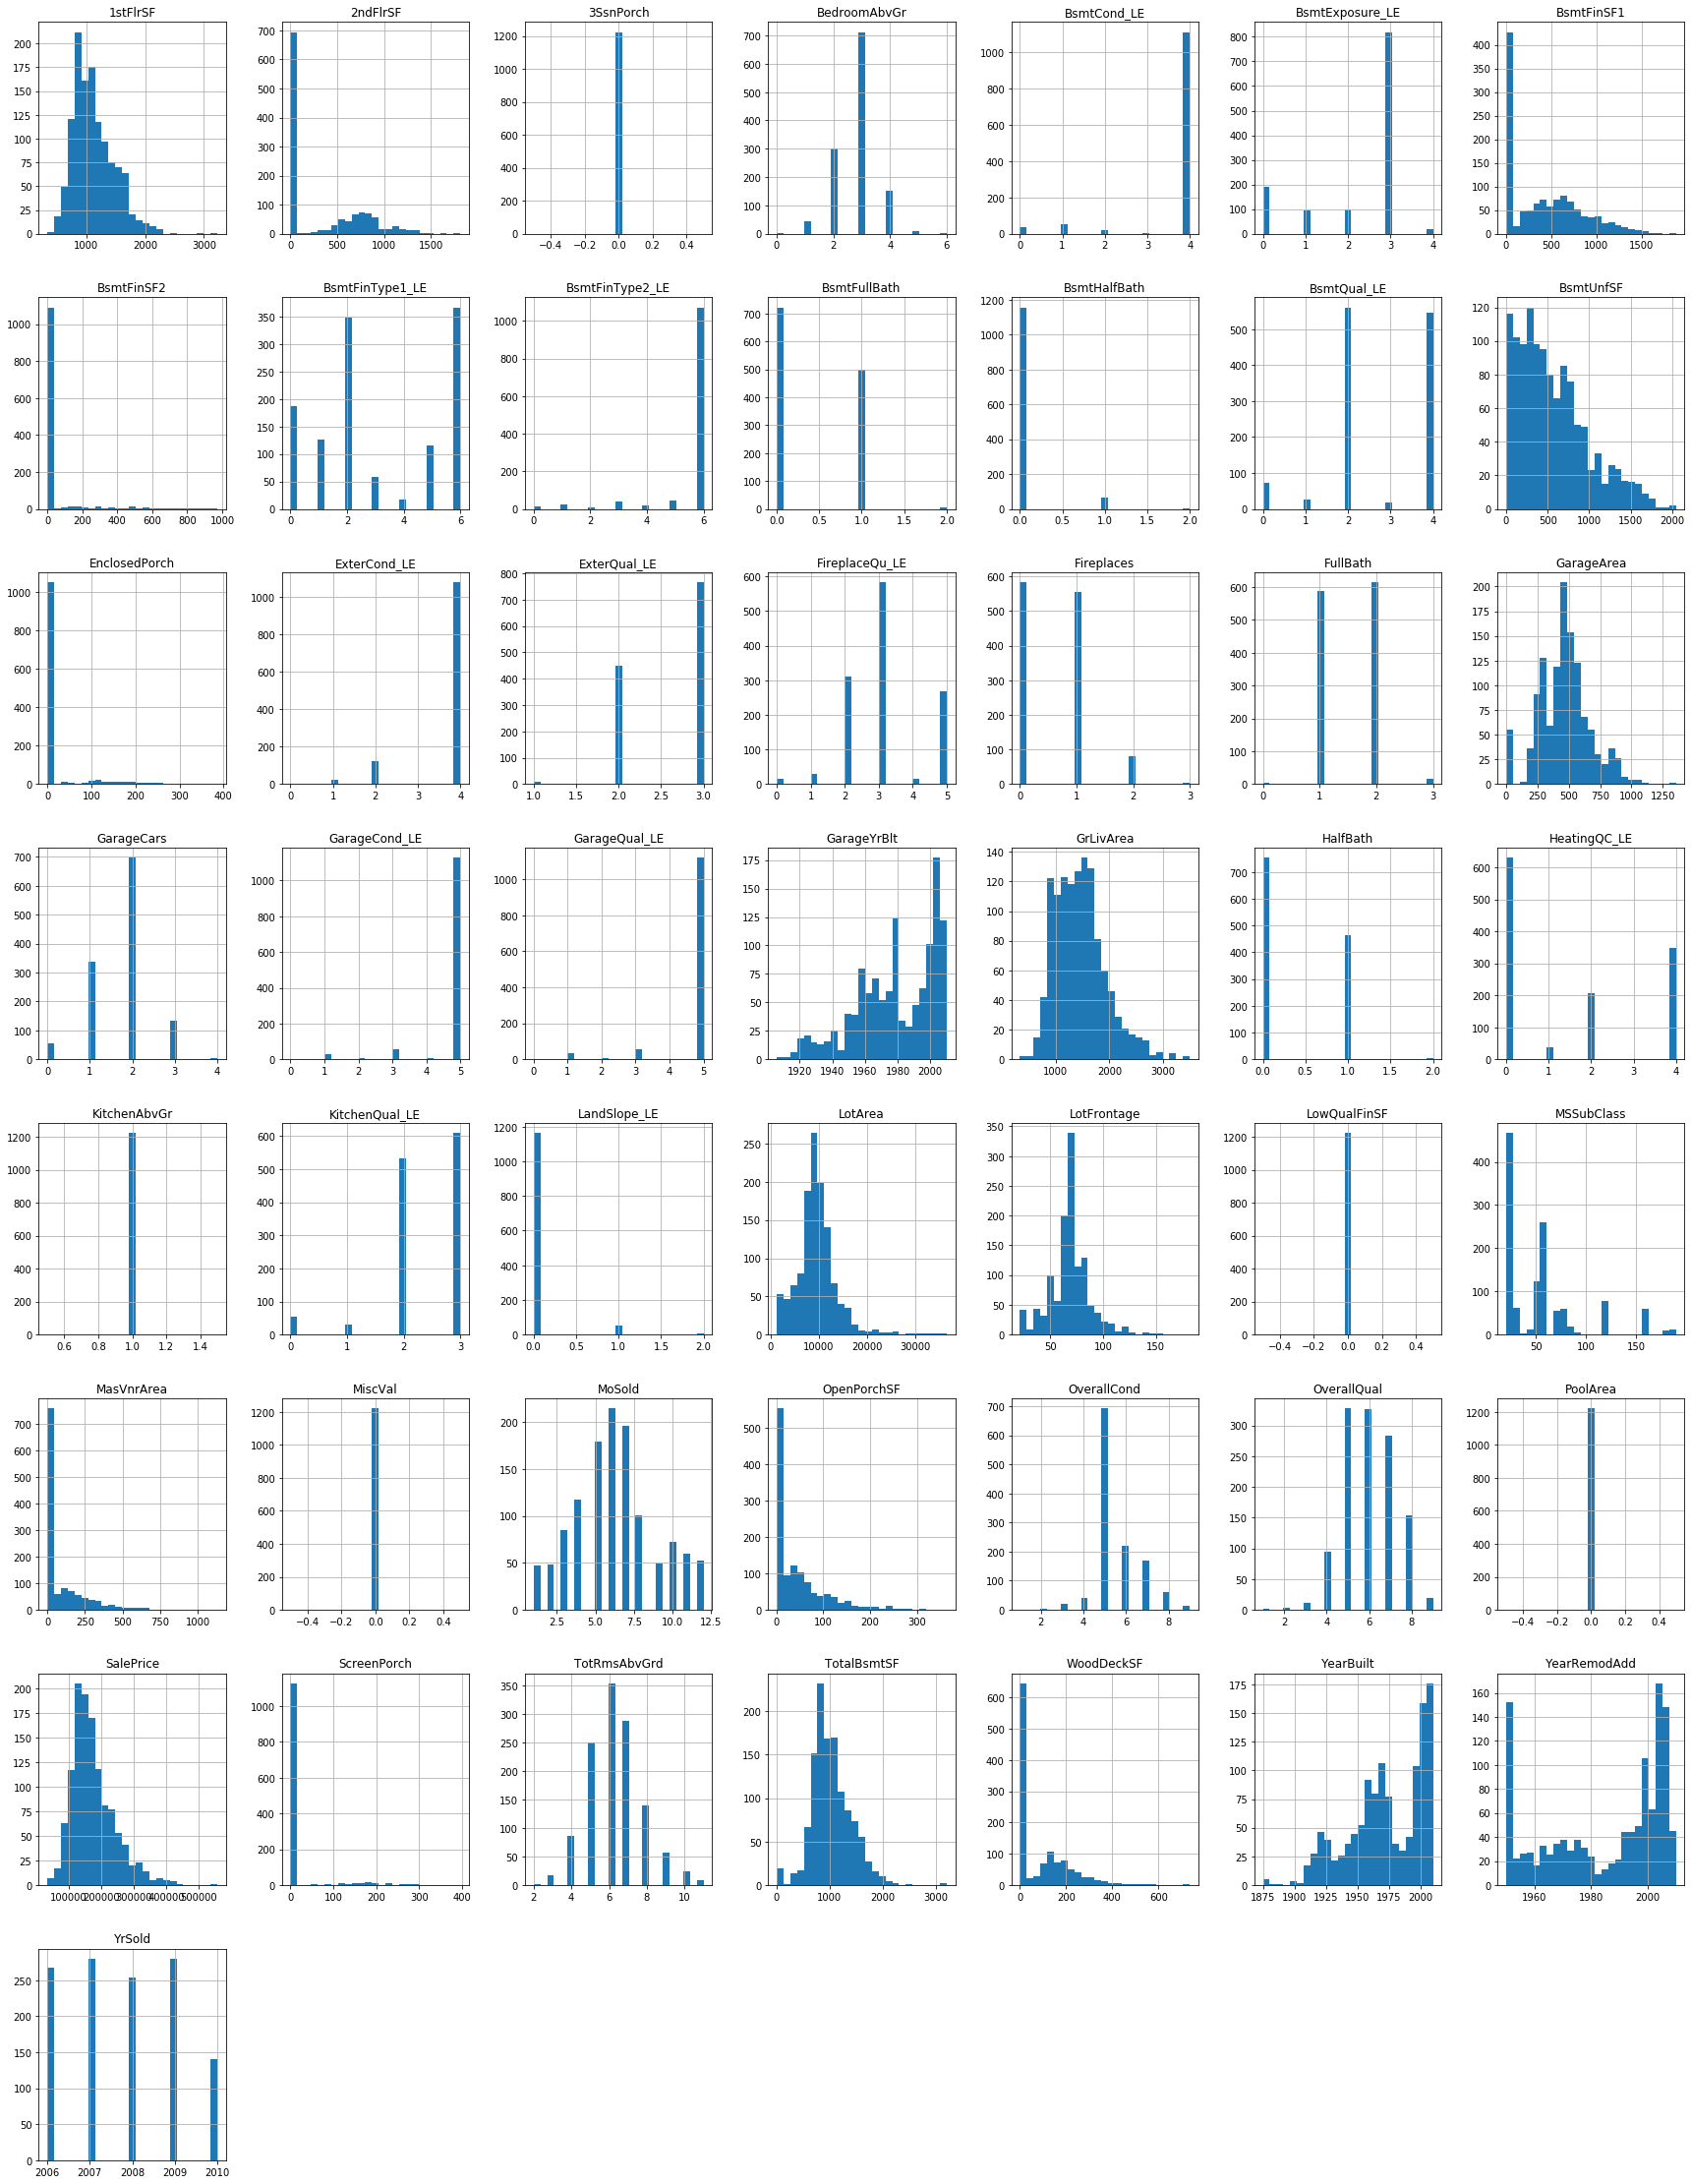

In [126]:
#  Plots a histograms of  parameters, while suppressing array output.
df_hist = df2.hist(bins=25, figsize = (30,40)) 

#### Observations:
The above hisograms shows that:
1. The normal distribution of each feature and thier statistics;
2. We may consider anything more than 3 standard deviations away from the mean to be considered an outlier;
3. A few data features are skwed and this skewness may impact the interpretation of feature importance;
4. The Target Variable Sale Price is skwed to the left and will be less likely to successfully predict the price for the most expensive houses i.e > 400K;

### Data Skewness

In [127]:
from scipy.stats import shapiro
resp = df.SalePrice
shapiro(resp)[1] #The p-value is not surprisingly less than 0.05, so we can conclude that the variable is skewed

3.206247534576162e-33

In [128]:
num_feats=df.dtypes[df.dtypes!='objects'].index
#calculate skew and sort
skew_feats=df[num_feats].skew().sort_values(ascending=False)
skewness=pd.DataFrame({'Skew':skew_feats})
skewness

,Skew
MiscVal,24.476794
PoolArea,14.828374
LotArea,12.207688
3SsnPorch,10.304342
LowQualFinSF,9.011341
LandSlope_LE,4.813682
KitchenAbvGr,4.488397
BsmtFinSF2,4.255261
ScreenPorch,4.122214
BsmtHalfBath,4.103403


#### Data Correlation

In [129]:
# compute the pair wise correlation for all columns
correlation_matrix = df.corr().round(2)

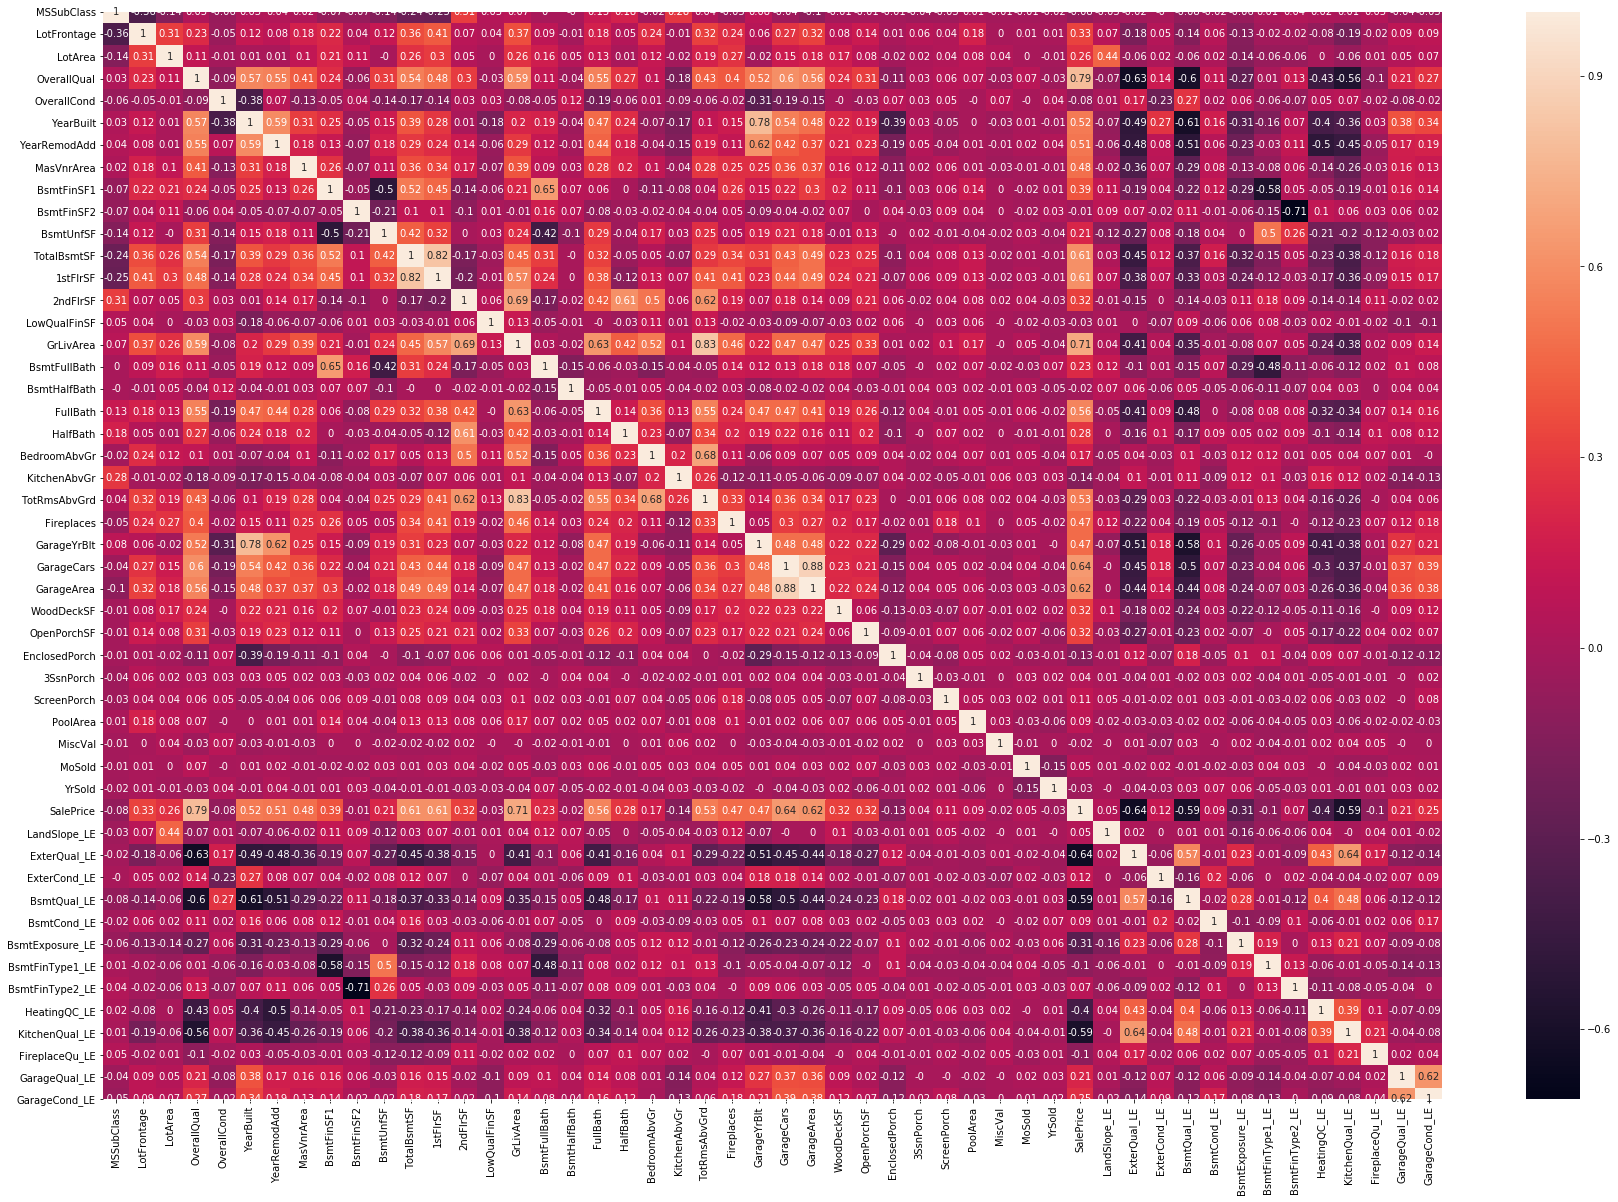

In [130]:
plt.subplots(figsize=(30,20))
corr_plot=sns.heatmap(data=correlation_matrix, annot=True) # Plot of the above correlation coefficietns between all numerical parameters

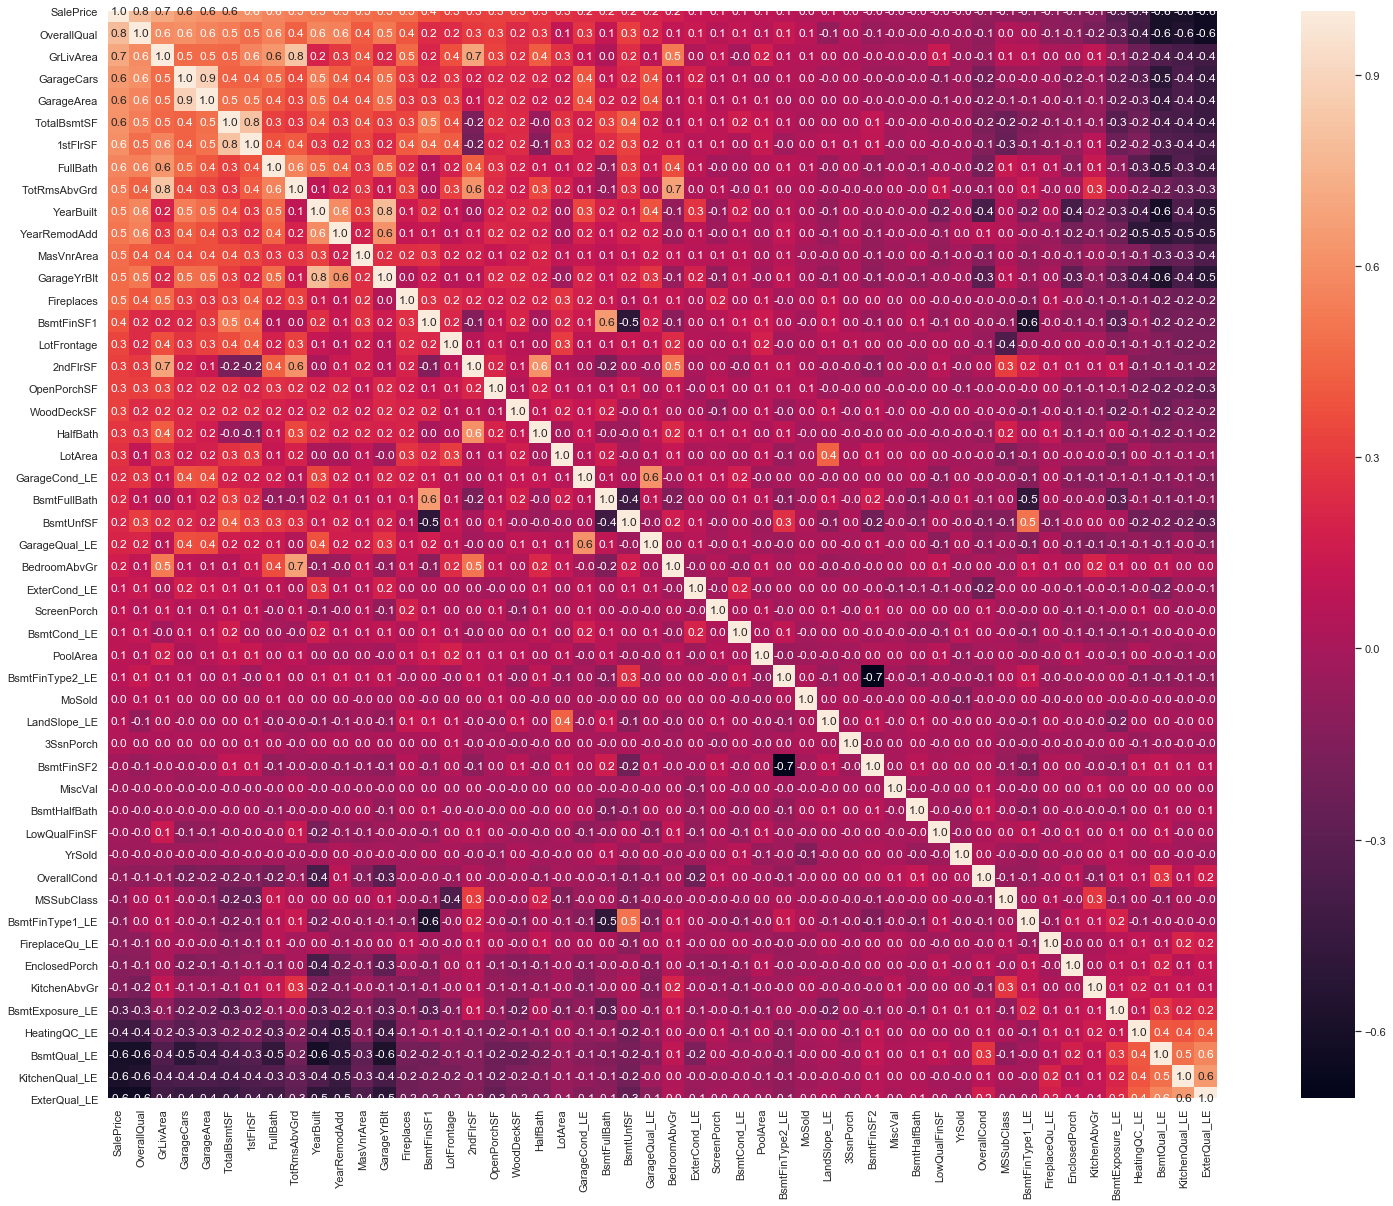

In [140]:
plt.subplots(figsize=(30,20))
#Plotting the top 15 numerical valriables correlated to the sale price. All those CorrCoef are >0.5
k_val=50
cols= correlation_matrix.nlargest(k_val, 'SalePrice')['SalePrice'].index
cm=np.corrcoef(df[cols].values.T)
sns.set(font_scale=1)
hm=sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.1f', annot_kws={'size':12}, 
               yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [141]:
most_corr=pd.DataFrame(cols)
most_corr.columns=['Most Correlated Features']
most_corr

,Most Correlated Features
0,SalePrice
1,OverallQual
2,GrLivArea
3,GarageCars
4,GarageArea
5,TotalBsmtSF
6,1stFlrSF
7,FullBath
8,TotRmsAbvGrd
9,YearBuilt


Check the variation of Sale Price with each indiviual feature of the top 8 and work on cleaning the vairations from outlieirs, if any are found necessary.

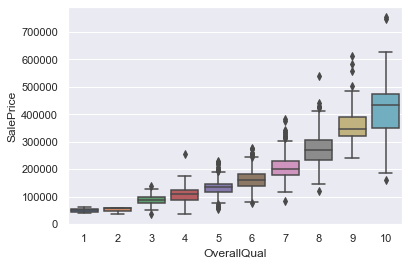

In [142]:
# With OverallQual variable 
sns.boxplot(x=df['OverallQual'], y=df['SalePrice'])

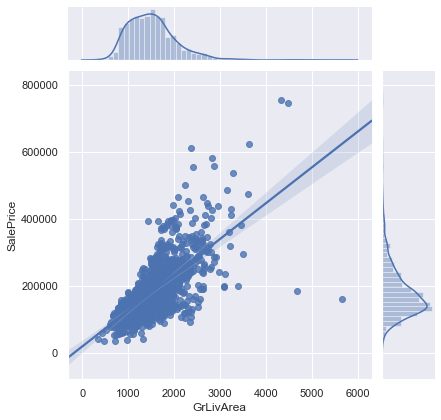

In [143]:
# With GrLivArea variable 
sns.jointplot(x=df['GrLivArea'], y=df['SalePrice'], kind='reg')

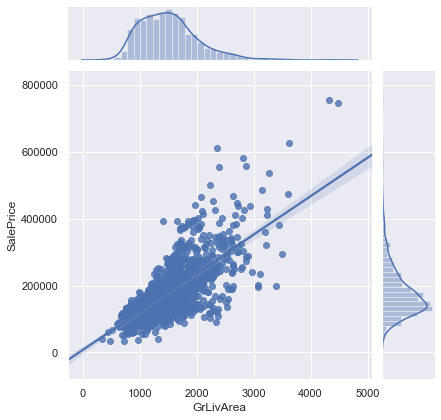

In [144]:
# Dropping the two outliers at the lower right corner of the 'GrLivArea' distribution
df=df.drop(df[(df['GrLivArea']>4000) & (df['SalePrice']<300000)].index).reset_index(drop=True)
sns.jointplot(x=df['GrLivArea'], y=df['SalePrice'], kind='reg')

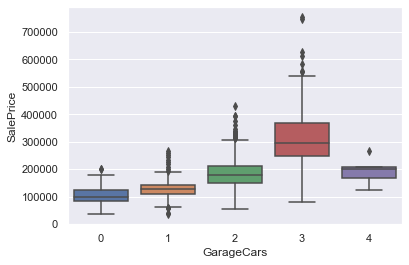

In [145]:
# With GarageCars variable
sns.boxplot(x=df['GarageCars'], y=df['SalePrice'])

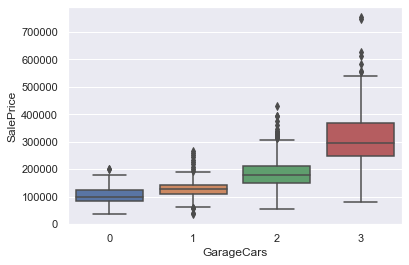

In [146]:
# With GarageCars
# It seems odd that when a house has space for 4 cars in garage the price would go down. 
#Will remove this outlier
df=df.drop(df[(df['GarageCars']>3) & (df['SalePrice']<300000)].index).reset_index(drop=True)
sns.boxplot(x=df['GarageCars'], y=df['SalePrice'])

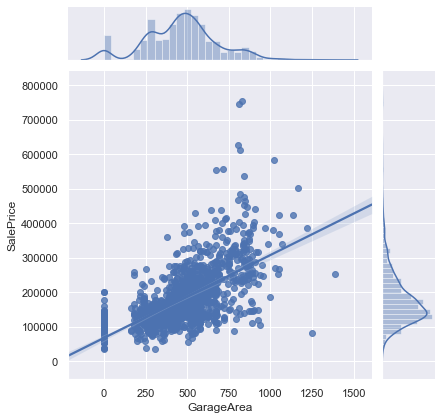

In [147]:
sns.jointplot(x=df['GarageArea'], y=df['SalePrice'], kind='reg')

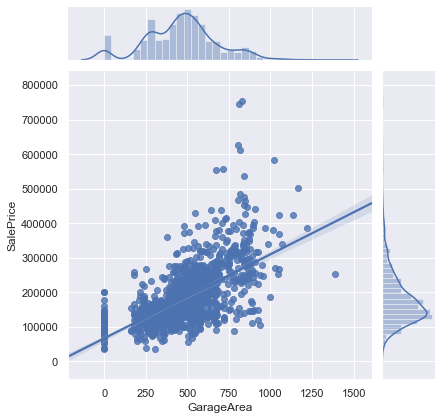

In [148]:
df=df.drop(df[(df['GarageArea']>1000) & (df['SalePrice']<200000)].index).reset_index(drop=True)
#df=df.drop(df[(df['GarageArea']<1000) & (df['SalePrice']>700000)].index).reset_index(drop=True)
sns.jointplot(x=df['GarageArea'], y=df['SalePrice'], kind='reg')

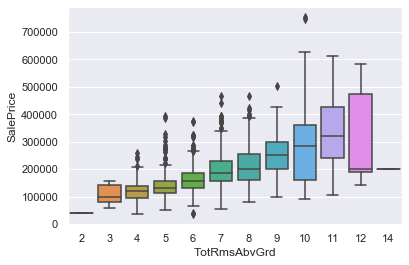

In [149]:
# 'TotRmsAbvGrd' seems ok. No significant outliers
sns.boxplot(x=df['TotRmsAbvGrd'], y=df['SalePrice'])

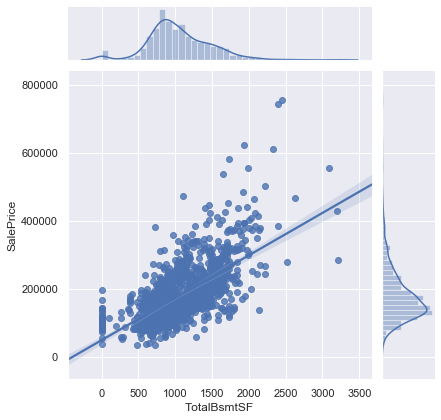

In [150]:
# TotalBsmtSF Looks ok! No significant outliers
sns.jointplot(x=df['TotalBsmtSF'], y=df['SalePrice'], kind='reg') 

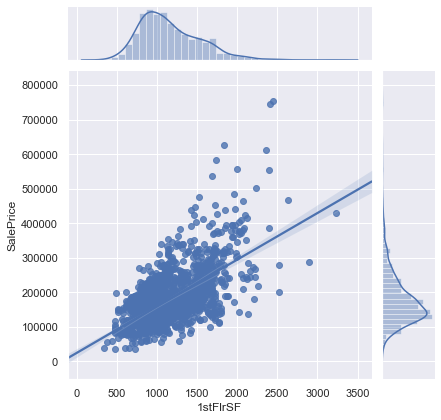

In [151]:
# 1stFlrSF Looks ok! No significant outliers 
sns.jointplot(x=df['1stFlrSF'], y=df['SalePrice'], kind='reg')

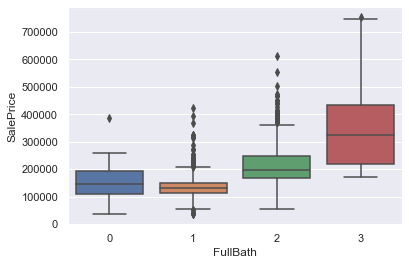

In [152]:
# FullBath : Overall trend is ok.
sns.boxplot(x=df['FullBath'], y=df['SalePrice'])

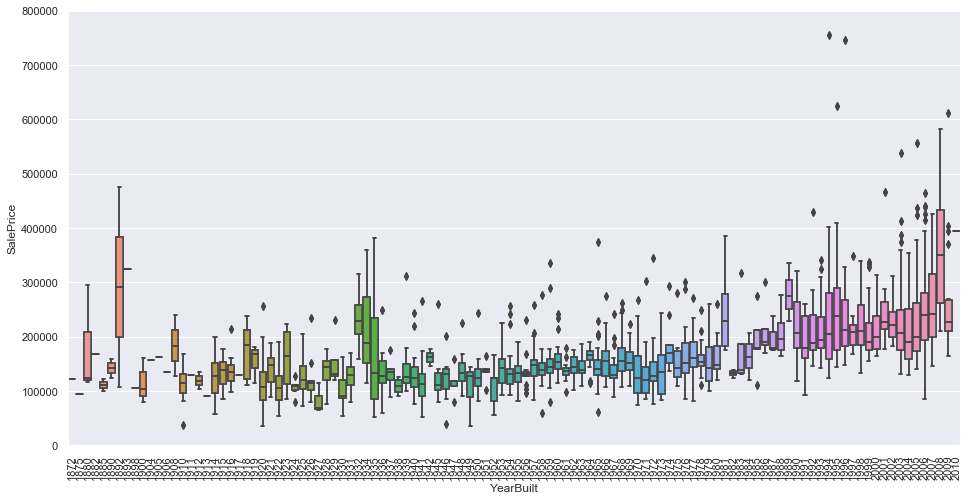

In [153]:
# YearBuilt : Plotted boxplot and a joint plot to check the yearly variations and the overall trend.
var2 = 'YearBuilt'
data = pd.concat([df['SalePrice'], df[var2]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var2, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
sns.boxplot(x=df['YearBuilt'], y=df['SalePrice'])
plt.xticks(rotation=90);

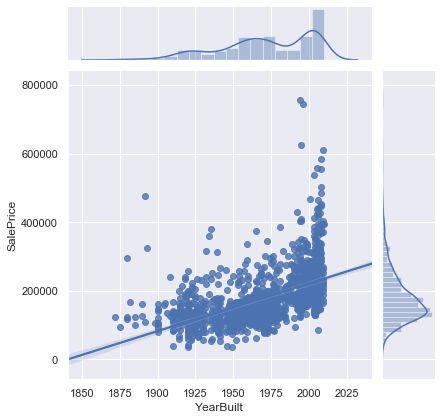

In [154]:
sns.jointplot(x=df['YearBuilt'], y=df['SalePrice'], kind='reg')
# The overall trend makes sense on the joint plot. 
# Year to year variations are not investigated further and so, no outliers were removed.

In [156]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF'

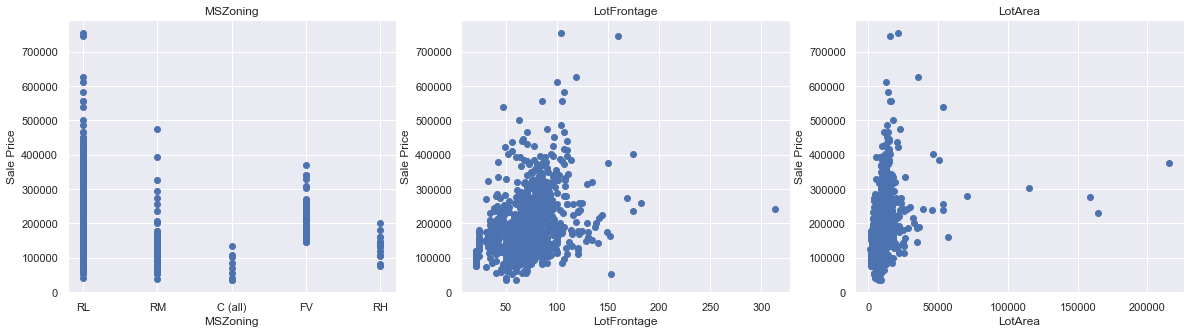

In [157]:
plt.figure(figsize=(20,5))
features = ['MSZoning', 'LotFrontage','LotArea']
target = df['SalePrice']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Sale Price')